# Clustering Algorithms in SkLearn

## Get Some Data

In [1]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn")
%matplotlib inline

def get_data(k,num_points=100):
    np.random.seed(9)
    data = []
    for i in range(0,k):
        for _ in range(0,num_points):
            data.append([np.random.normal(6*i),np.random.normal(i)])
    x1,y1 = zip(*data)
    #plt.xlabel('X')
    #plt.ylabel('Y')
    #plt.scatter(x1,y1)
    return data

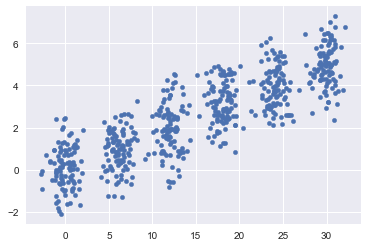

In [2]:
data = get_data(6)
x,y = zip(*data)
plt.scatter(x, y, s=20);

## DBSCAN

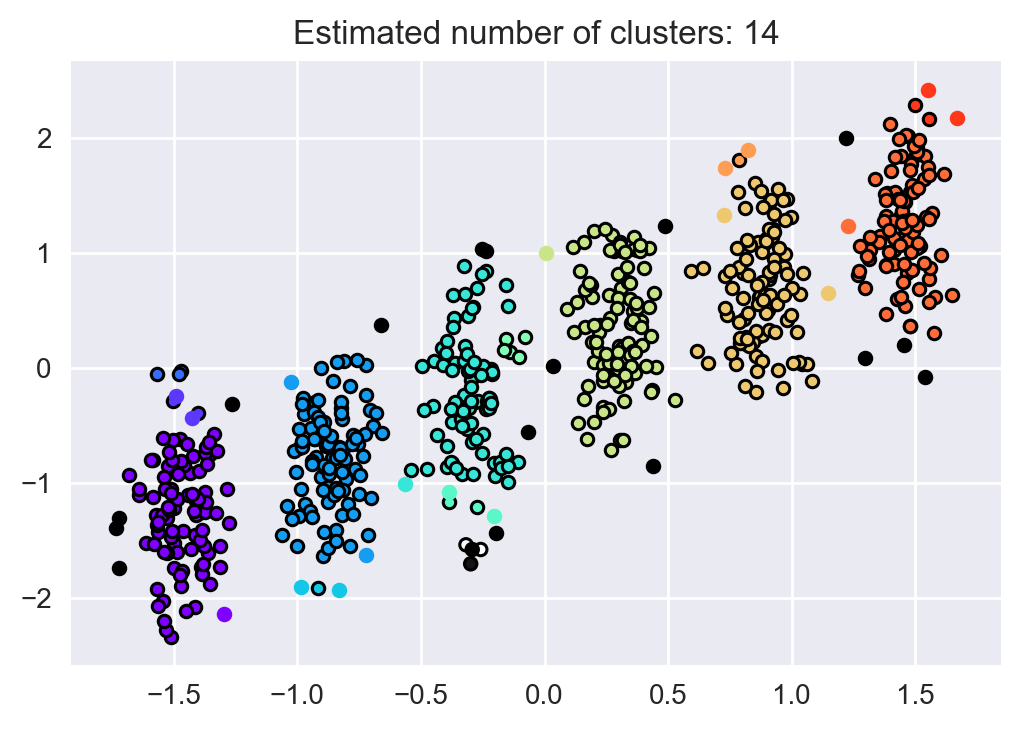

In [5]:
X = StandardScaler().fit_transform(data)
db = DBSCAN(eps=0.15, min_samples=3).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1)
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

## Get Some Data For Other Demos

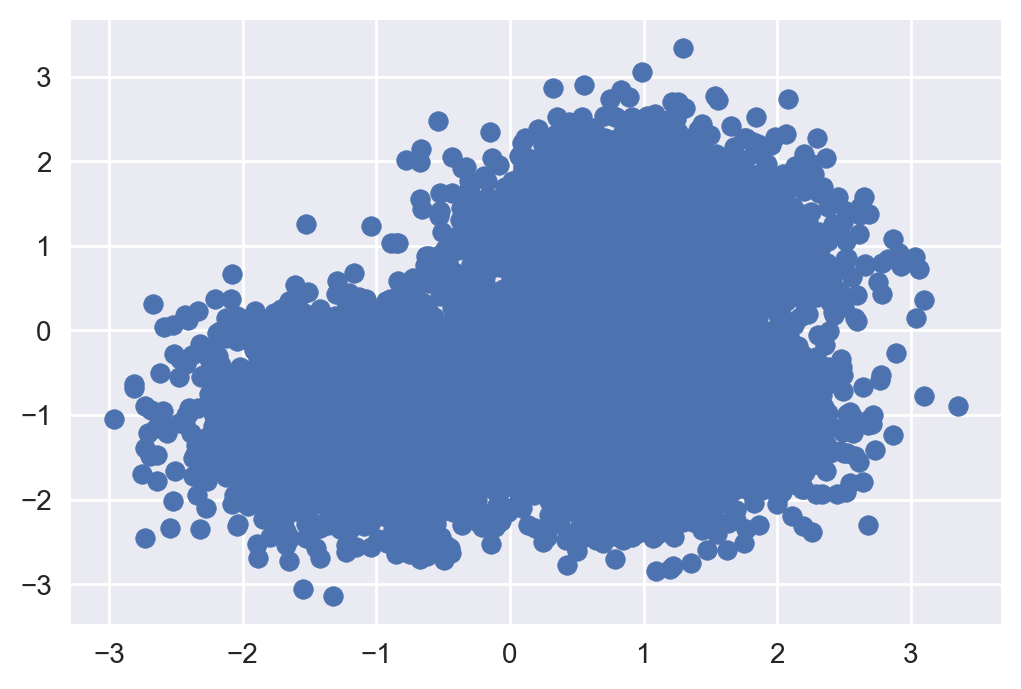

In [6]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
plt.figure(dpi=200)
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
x,y = zip(*X)
plt.scatter(x,y);

## Mean Shift

In [7]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


<Figure size 432x288 with 0 Axes>

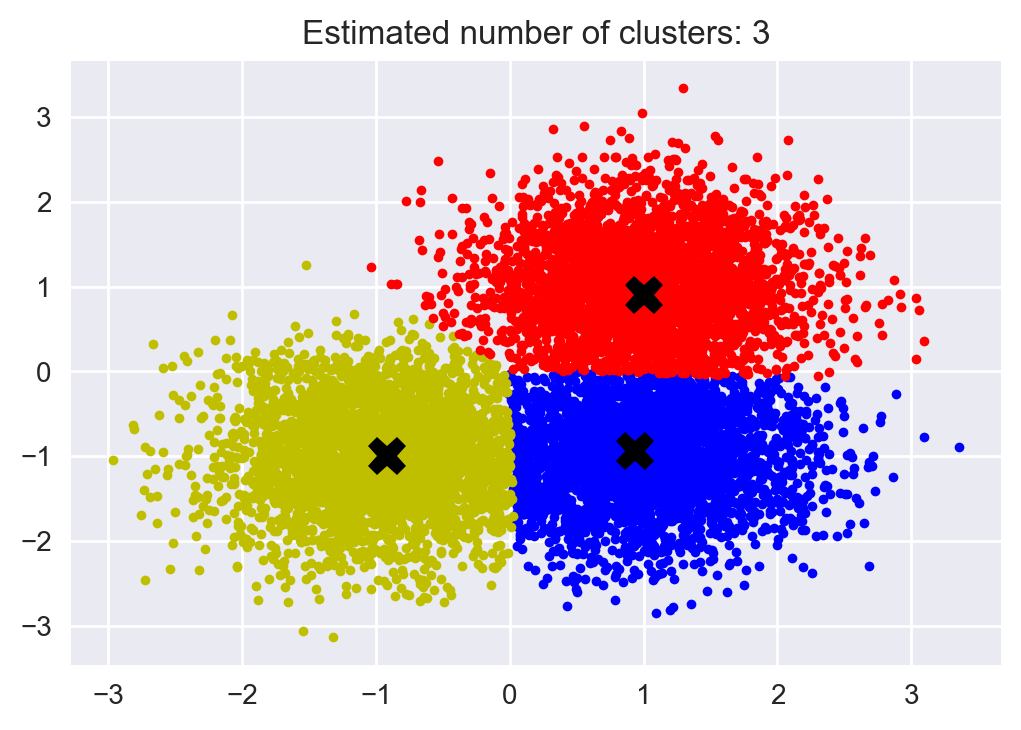

In [8]:
from itertools import cycle

plt.figure(1)
plt.clf()
plt.figure(dpi=200)
colors = cycle('byrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='k',
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_);

In this case, the result is very similar to Kmeans, but that will not always be true (also, I'm including Kmeans here since we haven't shown you a nice way to plot Kmeans results before).

## KMeans

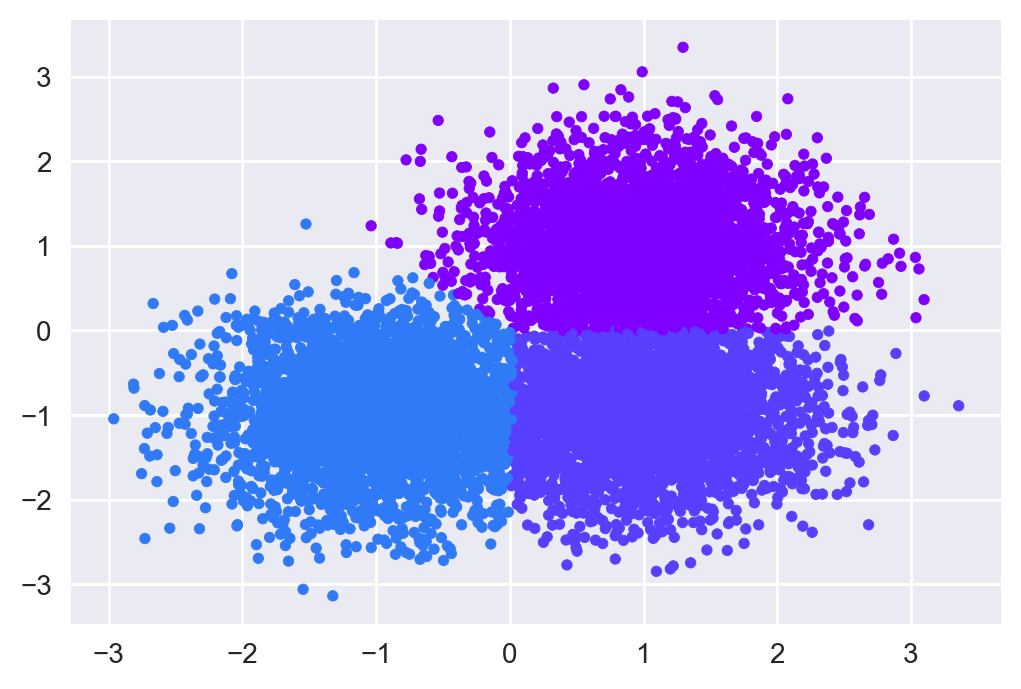

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
ypred = km.fit_predict(X)
x,y = zip(*X)
plt.figure(dpi=200)
plt.scatter(X[:,0],X[:,1],c=plt.cm.rainbow(ypred*20),s=14);

## Hierarchical Clustering

ward : 3.28s
average : 3.54s
complete : 2.70s


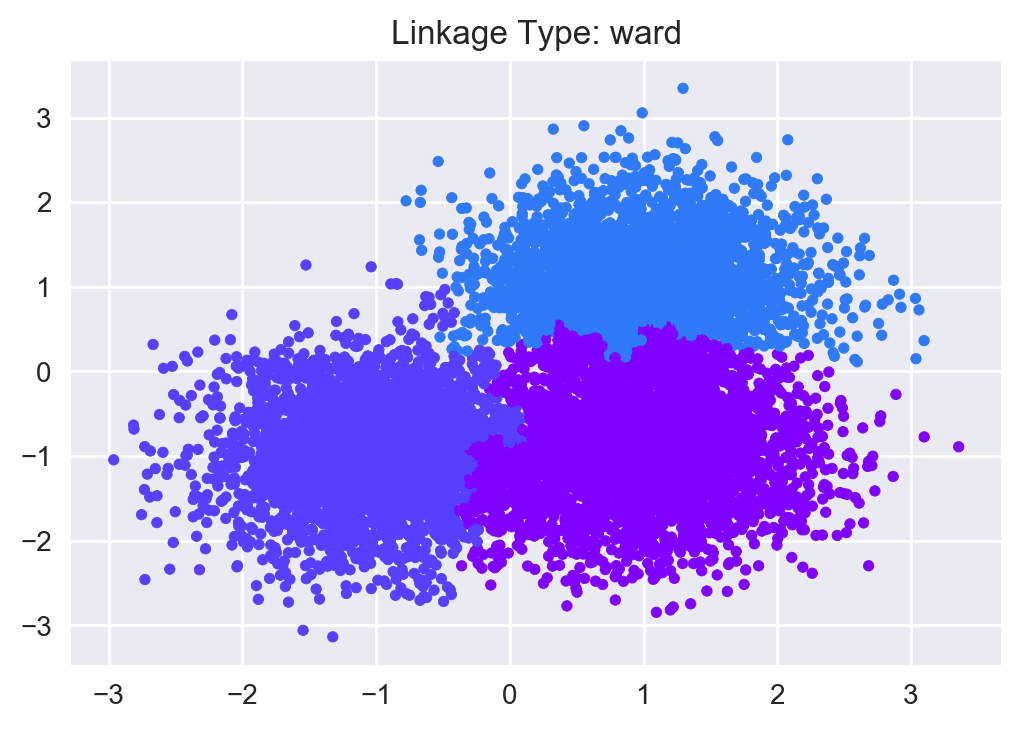

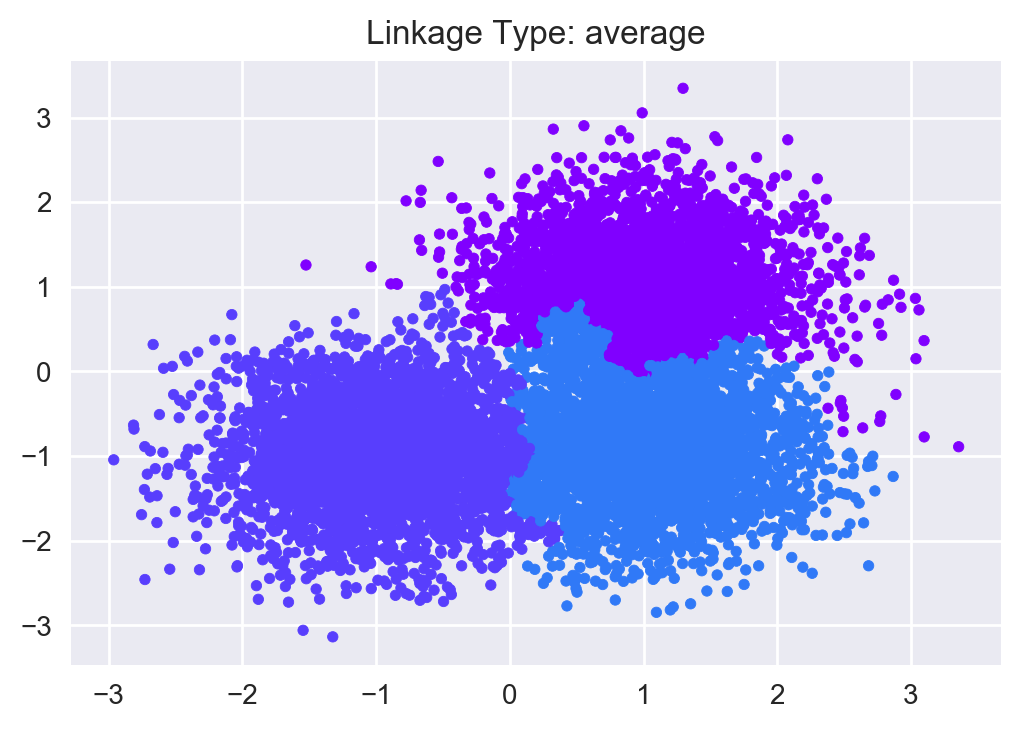

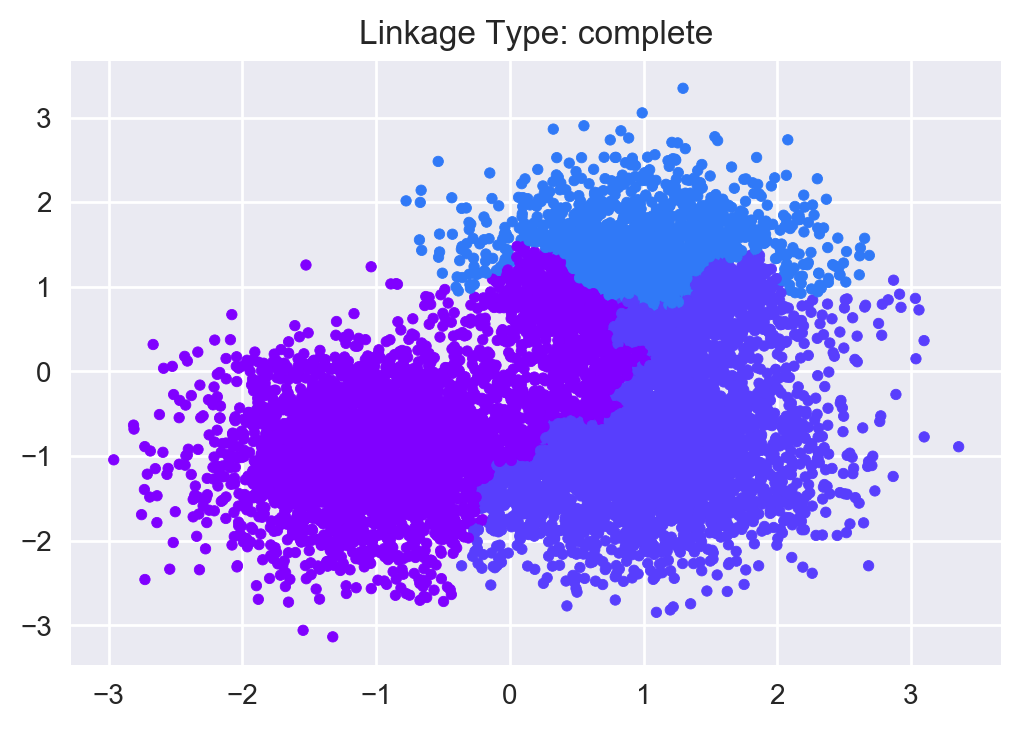

In [10]:
from time import time
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(X)
    print("%s : %.2fs" % (linkage, time() - t0))
    
    x,y = zip(*X)
    plt.figure(dpi=200)
    plt.scatter(x,y,c=plt.cm.rainbow(clustering.labels_*20),s=14)
    plt.title("Linkage Type: %s" % linkage)

### Hierarchy with Connectivity Constraints

Compute unstructured hierarchical clustering...
Elapsed time: 0.06s
Number of points: 1500


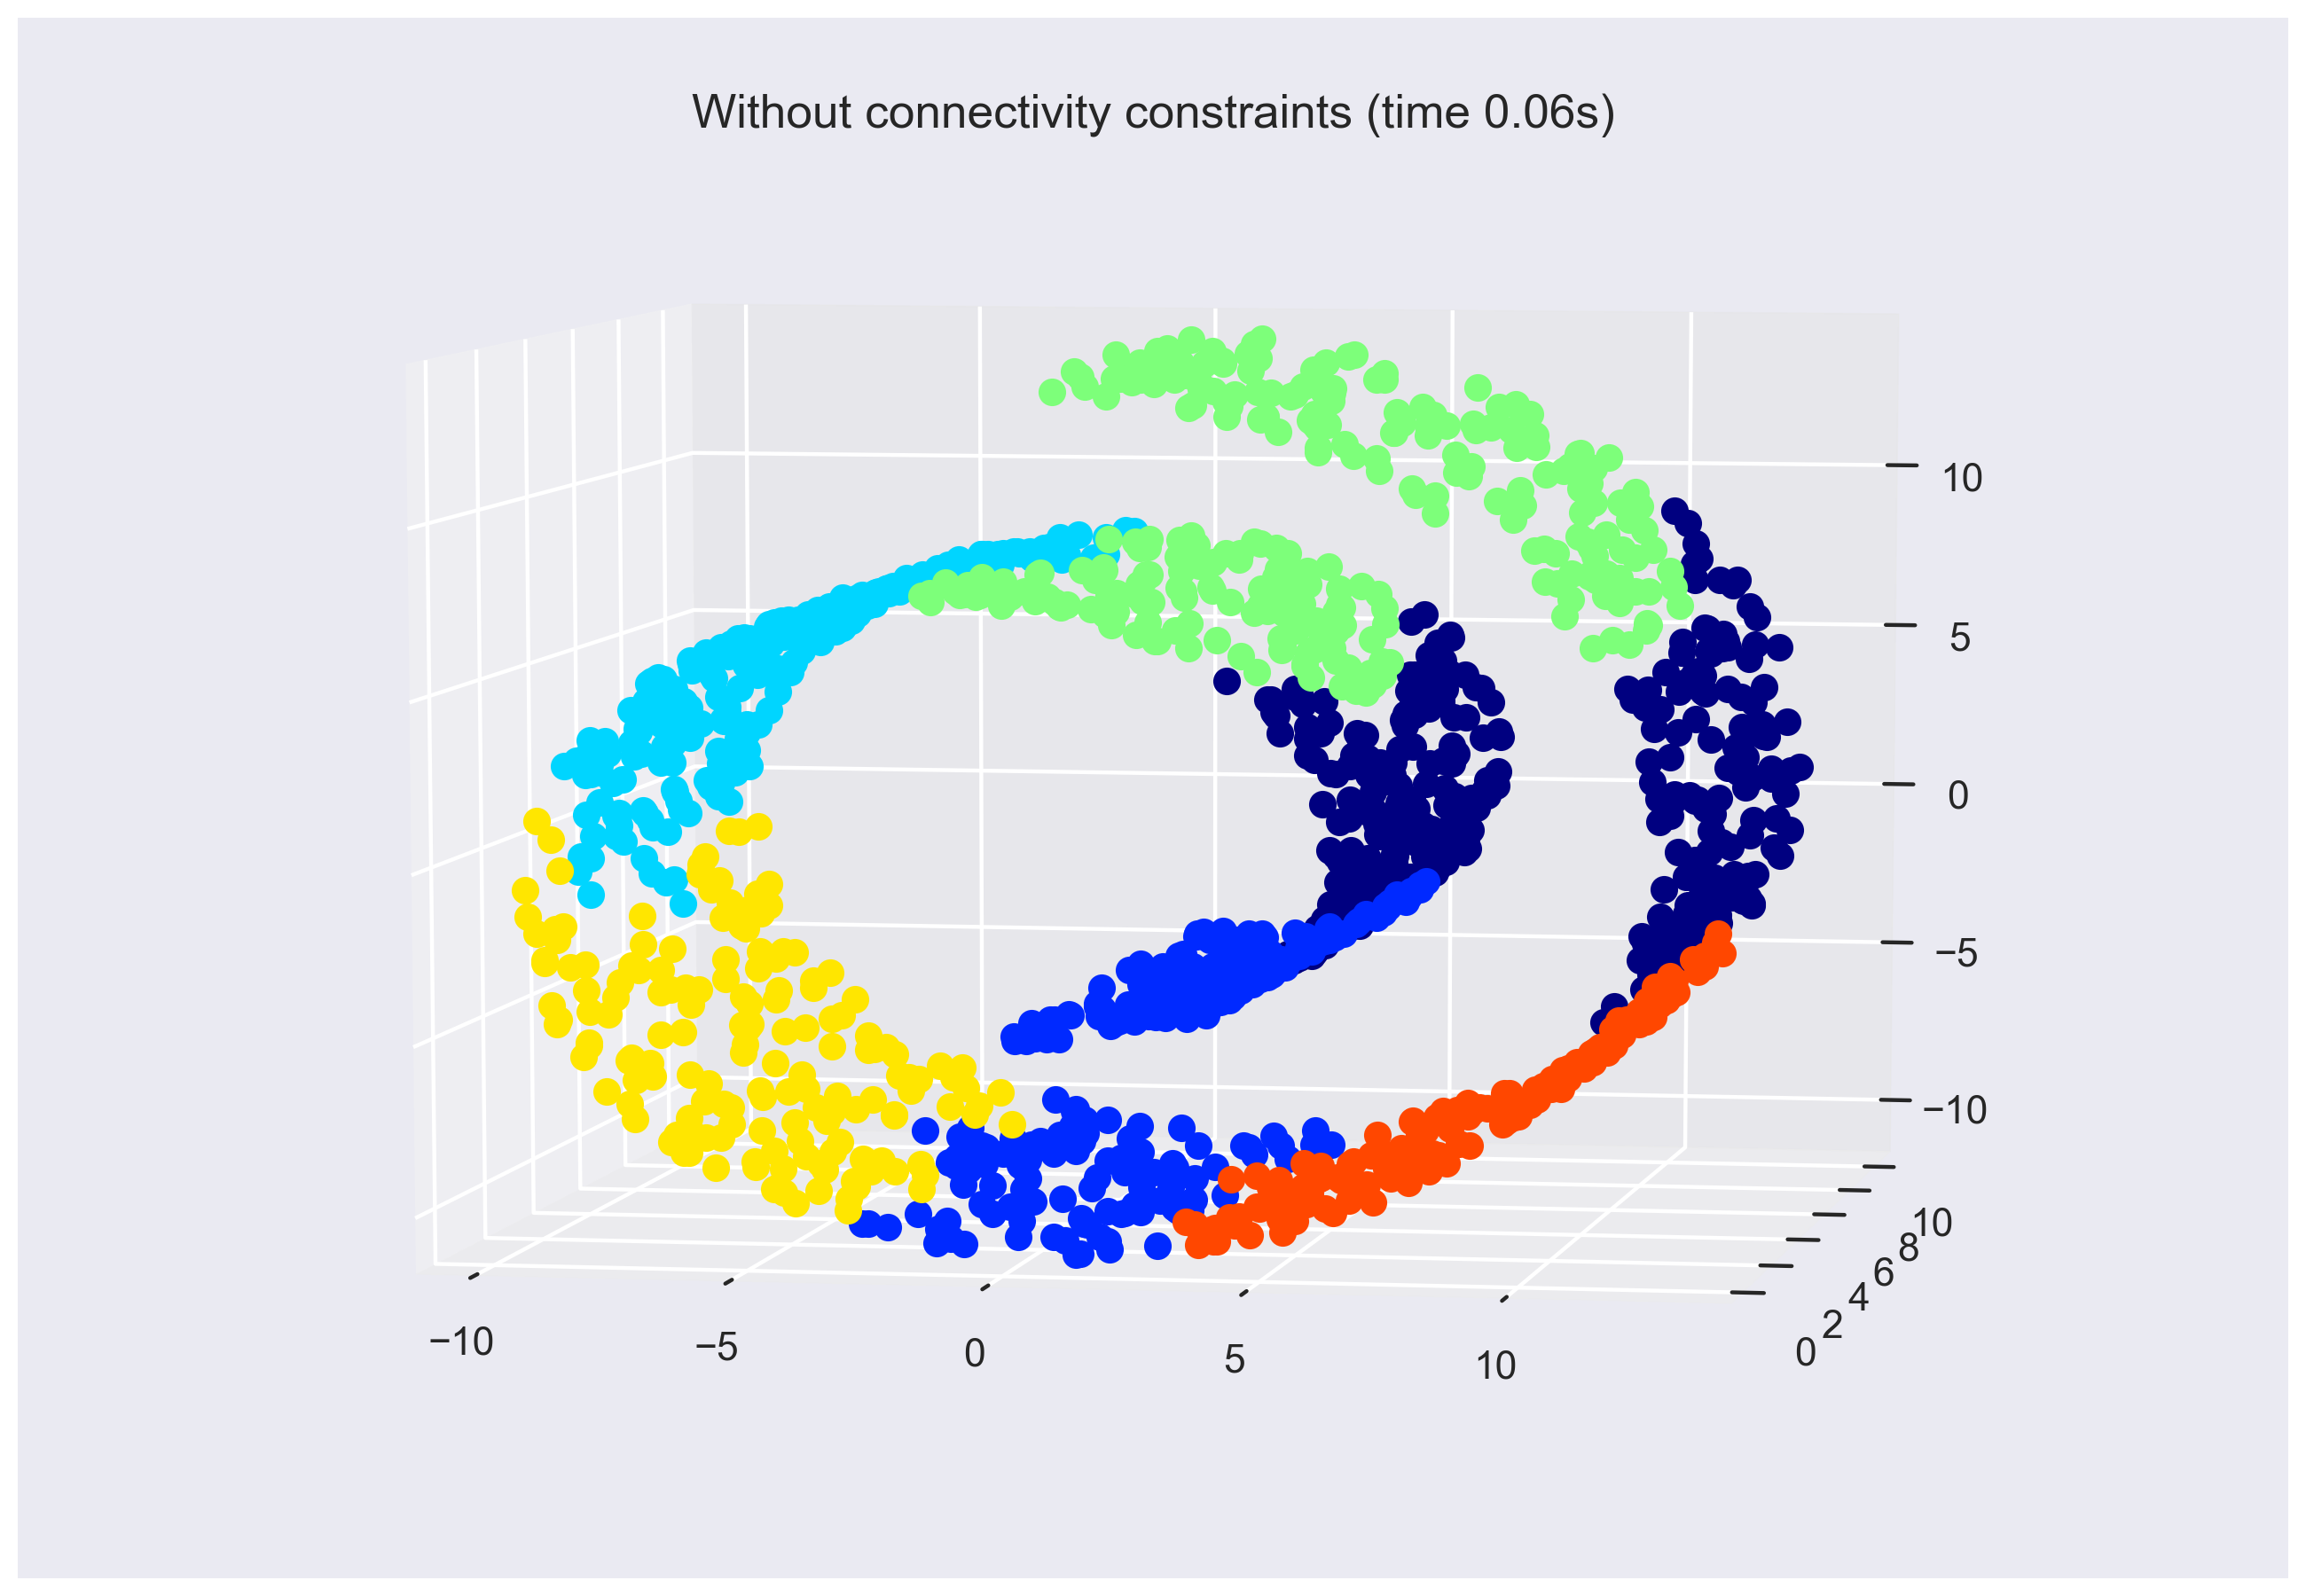

In [11]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll
plt.style.use("seaborn-poster")

n_samples = 1500
noise = 0.05
X3, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X3[:, 1] *= .5

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X3)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

fig = plt.figure(dpi=200)
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X3[label == l, 0], X3[label == l, 1], X3[label == l, 2],
              'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time);

Compute structured hierarchical clustering...
Elapsed time: 0.14s
Number of points: 1500


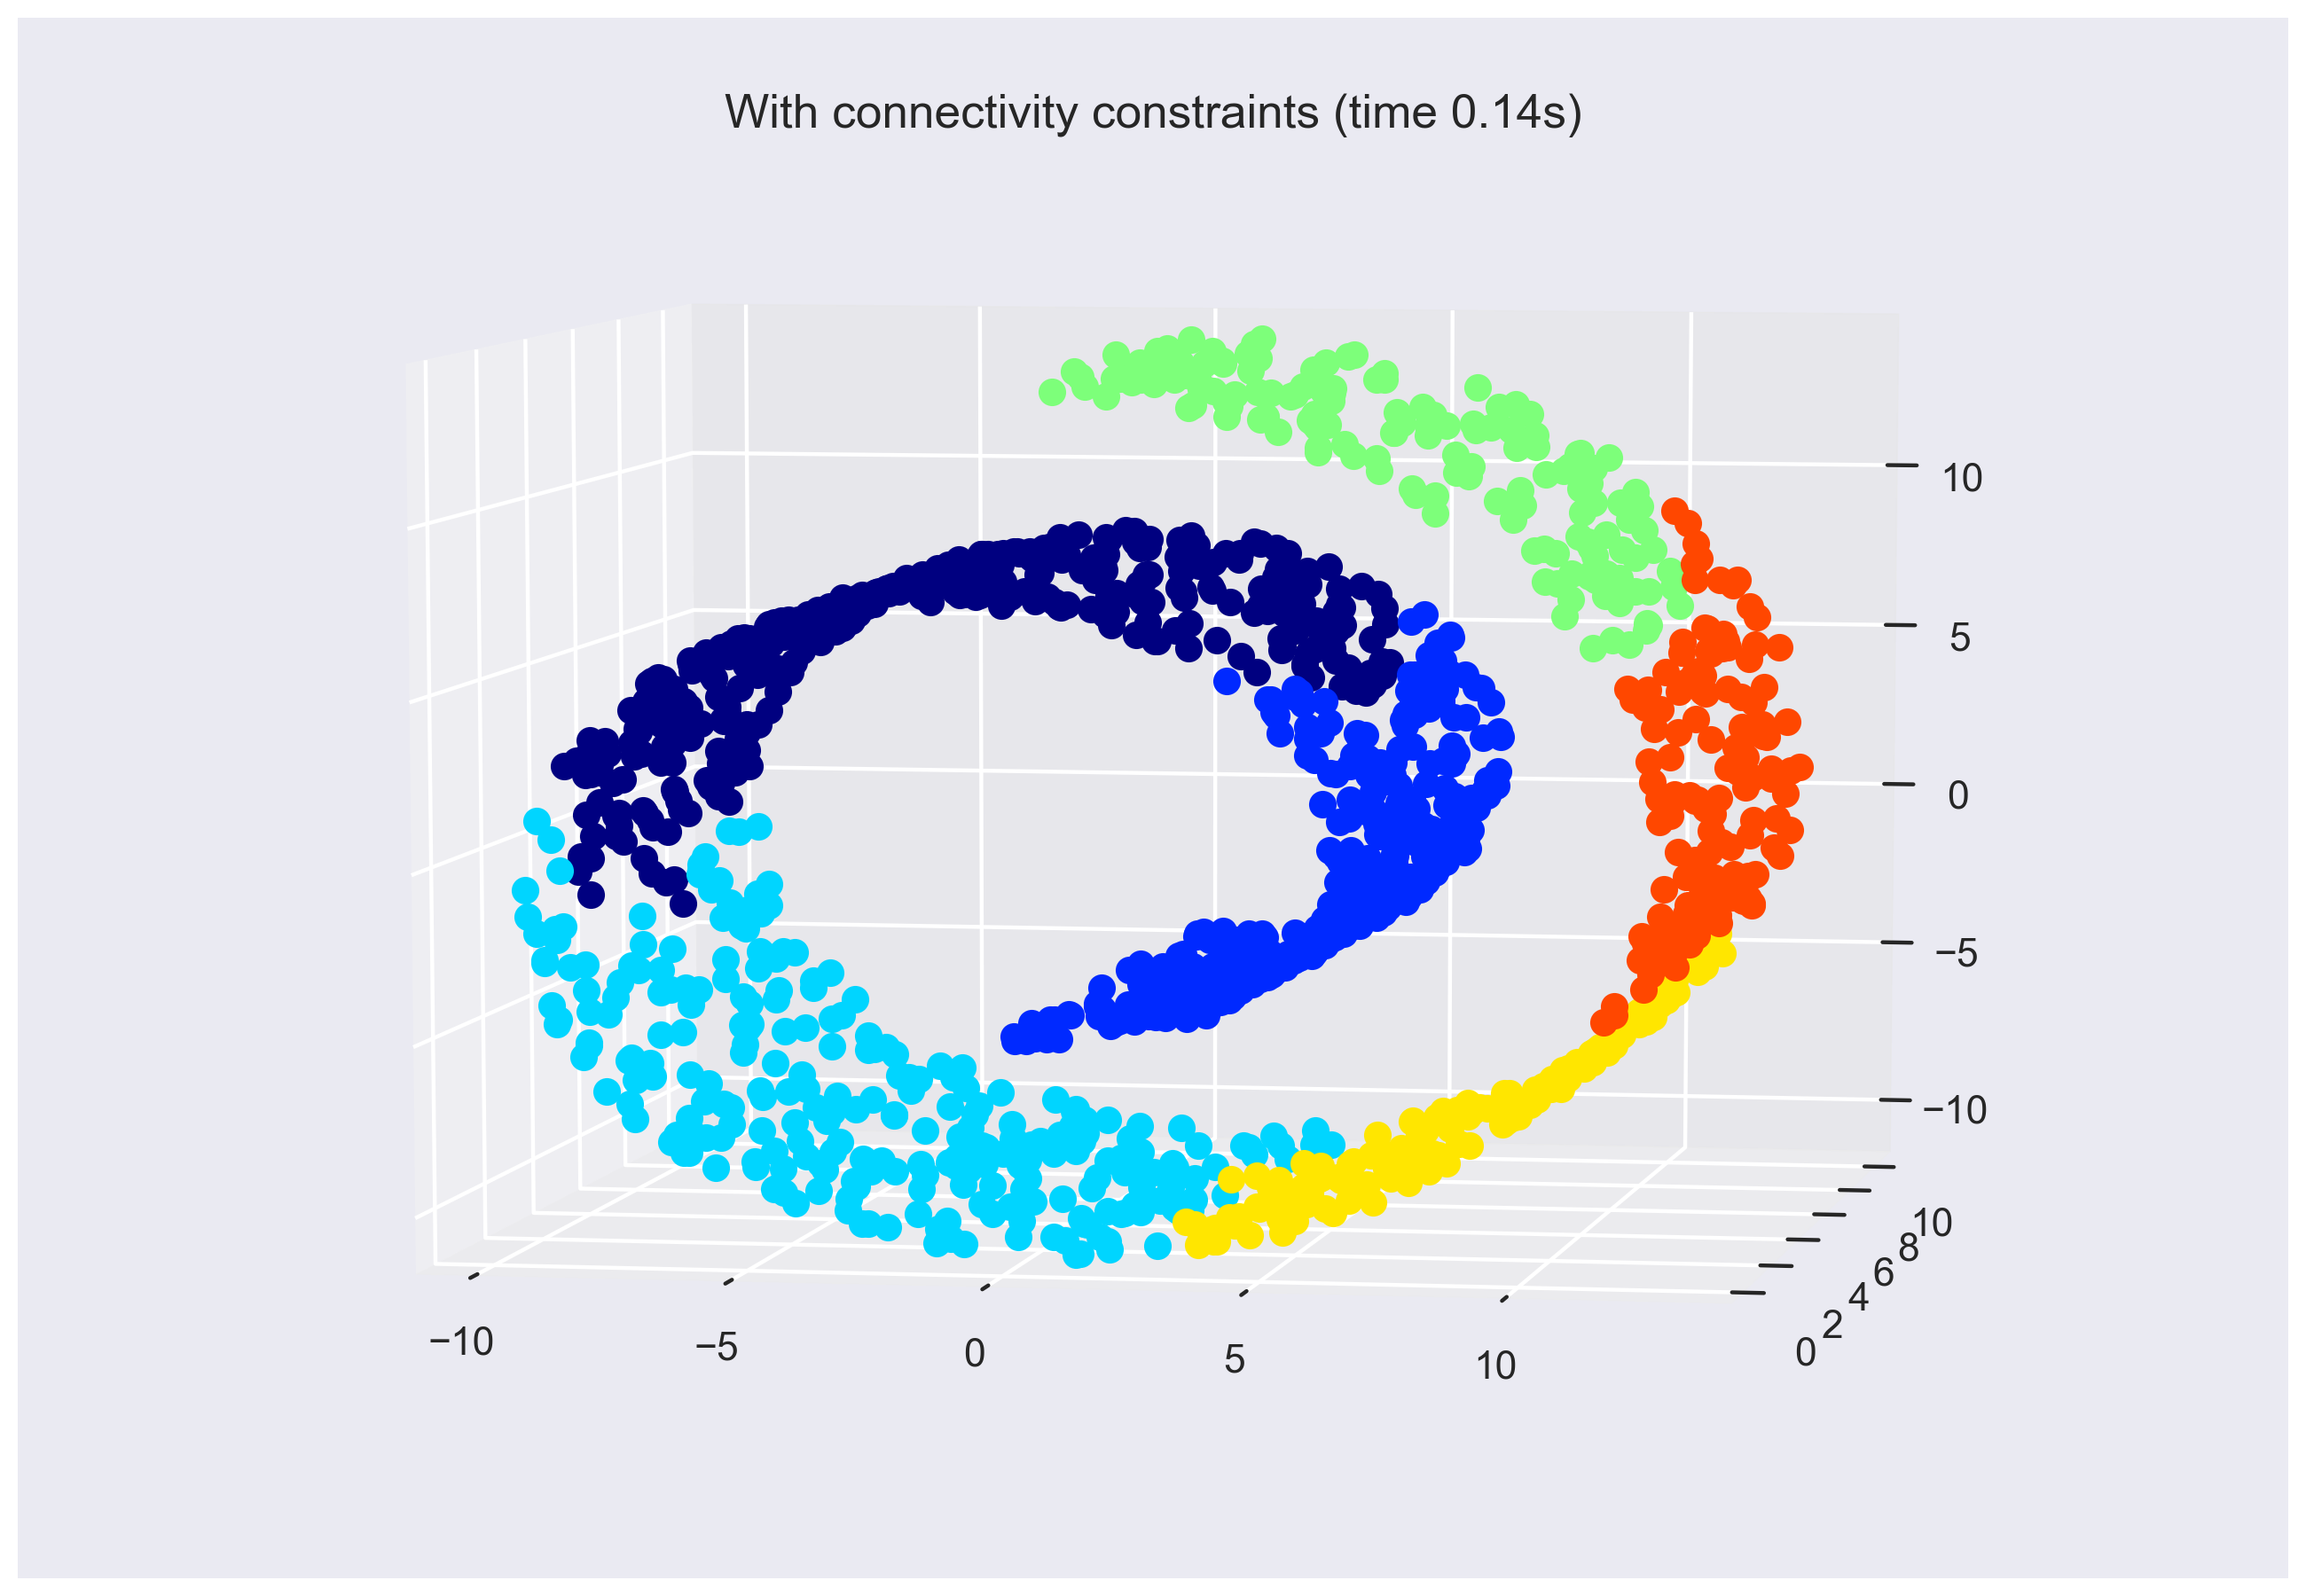

In [12]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X3, n_neighbors=10, include_self=False)

print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X3)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

fig = plt.figure(dpi=200)
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X3[label == l, 0], X3[label == l, 1], X3[label == l, 2],
              'o', color=plt.cm.jet(float(l) / np.max(label + 1)))
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time);

### Dendrograms with Agglomerative Clustering in SciPy

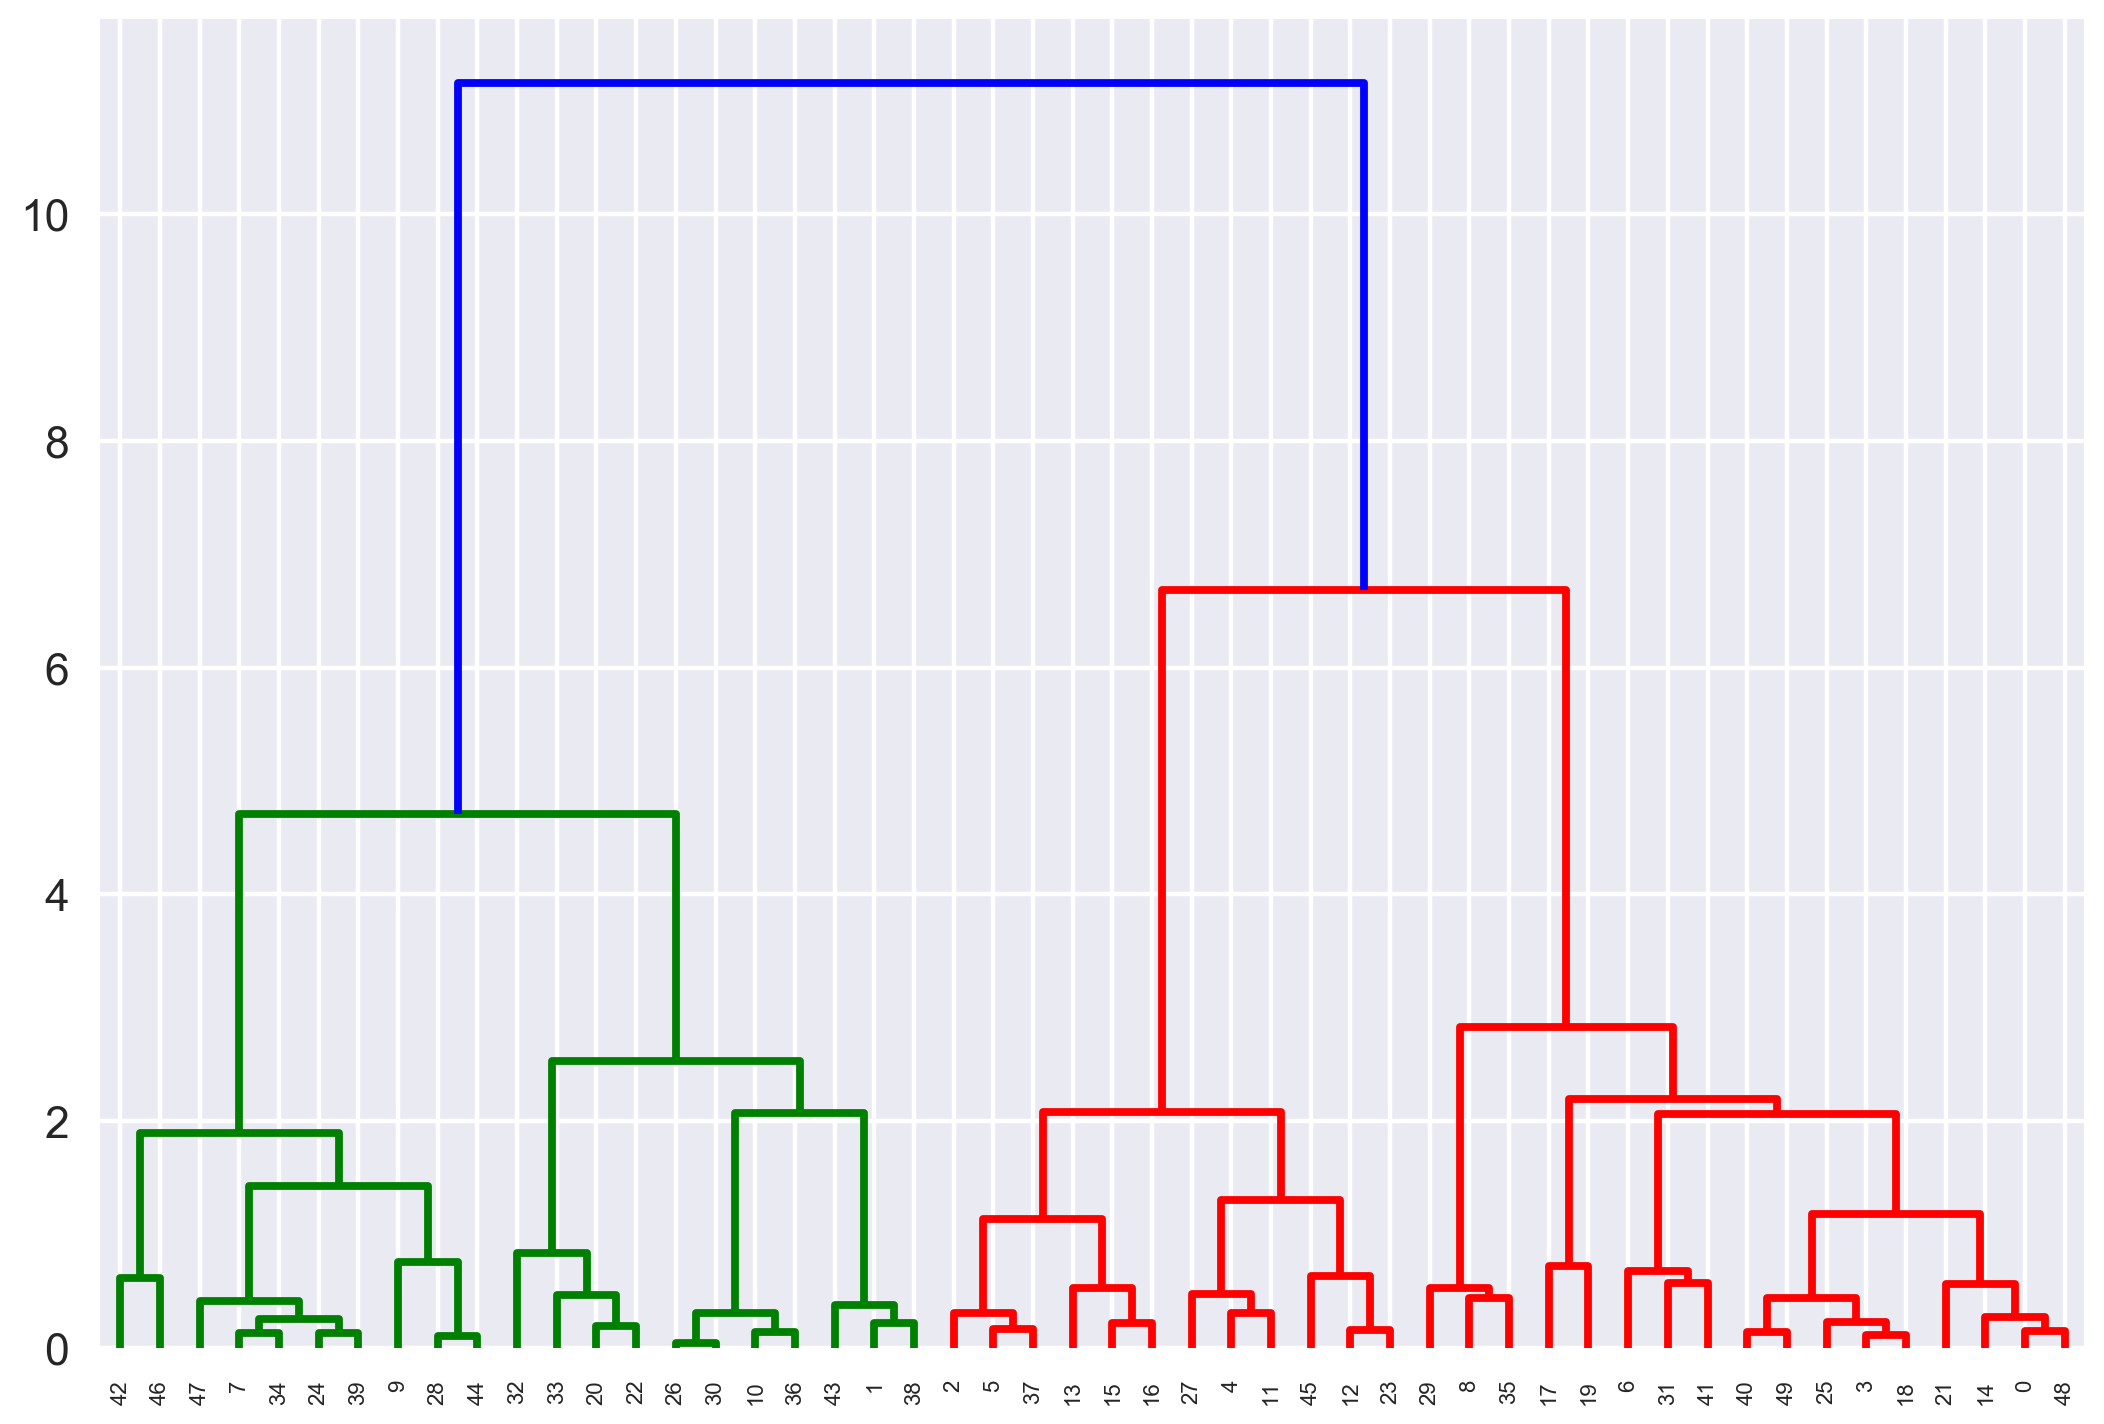

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Xdata, _ = make_blobs(n_samples=50, centers=centers, cluster_std=0.6)
Z = linkage(Xdata,'ward')
plt.figure(dpi=200)
dendrogram(Z,truncate_mode='mlab',); 

## Spectral Clustering

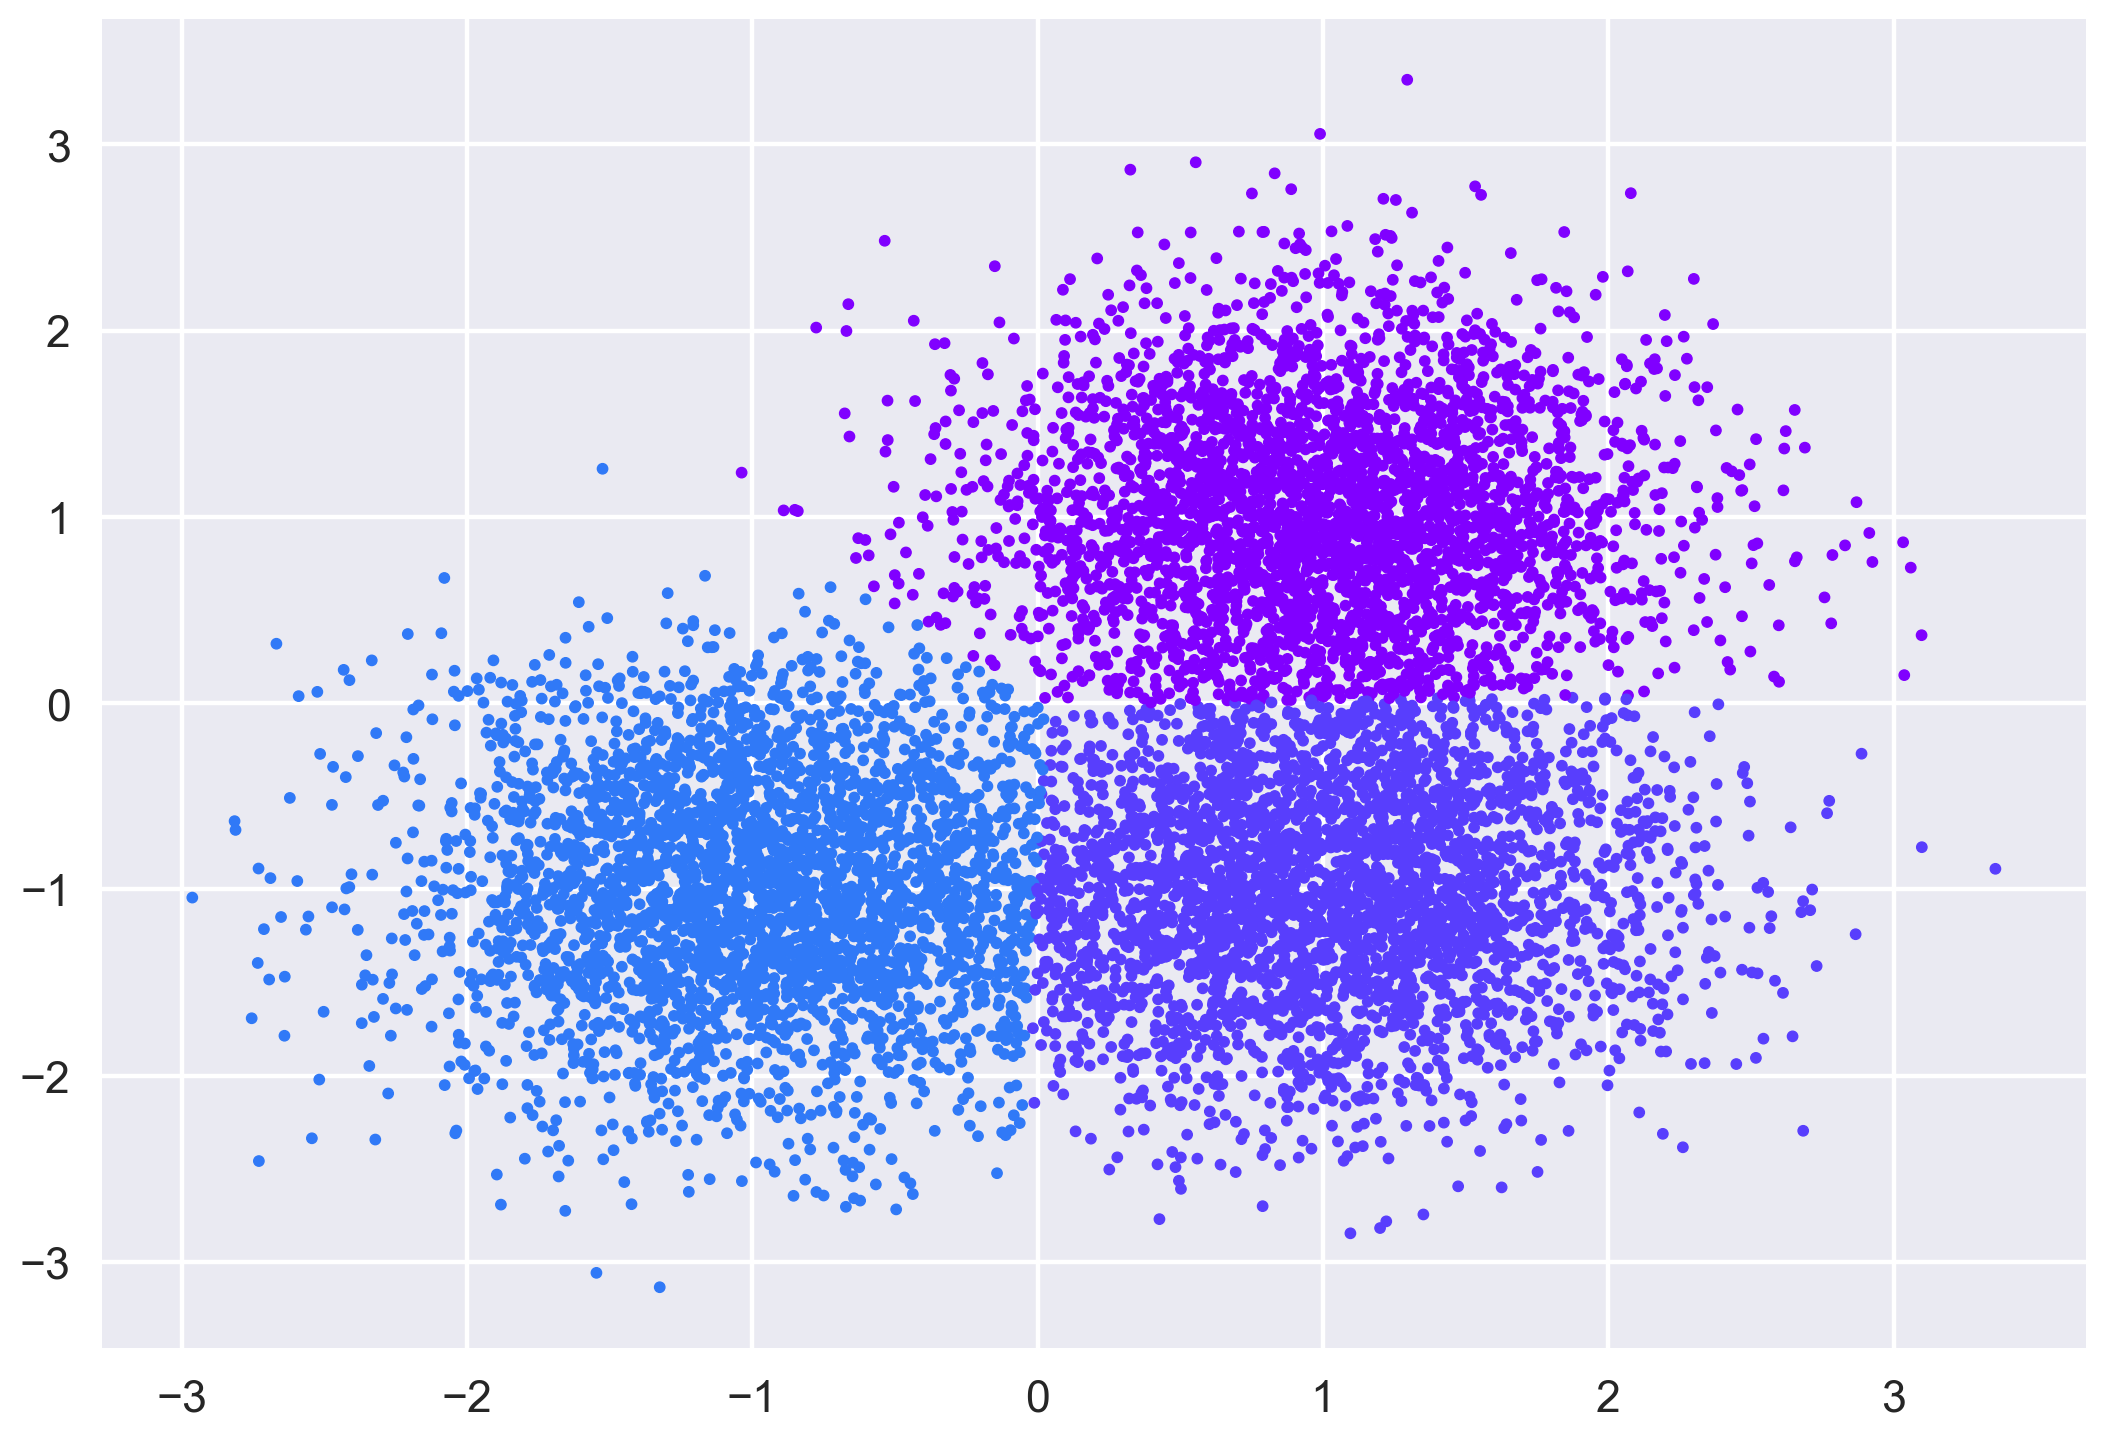

In [14]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3)
ypred = sc.fit_predict(X)
x,y = zip(*X)
plt.figure(dpi=200)
plt.scatter(X[:,0],X[:,1],c=plt.cm.rainbow(ypred*20),s=14);

# t-SNE (For Visualization of High Dim Data Only!)

NEVER EVER go to tSNE space and cluster there. It's meaningless, non-representative, and categorically wrong.

Some resources on tSNE with neat plots that are interactive:

https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm

http://colah.github.io/posts/2014-10-Visualizing-MNIST/

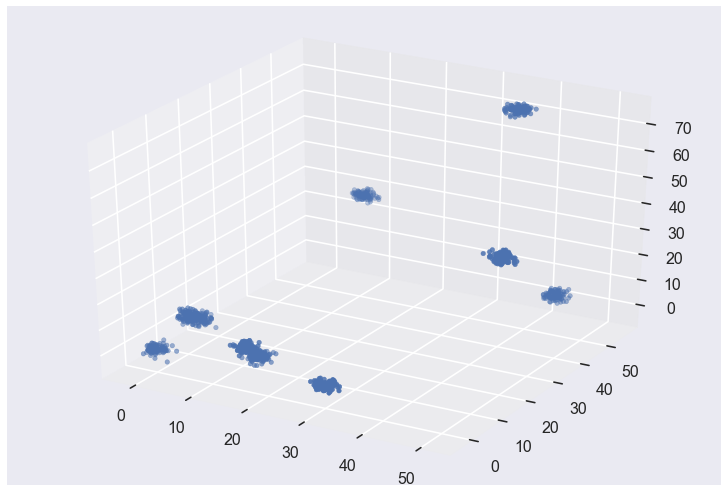

In [78]:
from mpl_toolkits.mplot3d import Axes3D

def get_high_dim_data(k,num_dim=20,num_points=100):
    np.random.seed(9)
    data = []
    modifiers = []
    for i in range(0,k):
        modifiers = np.random.randint(k,size=num_dim)
        for _ in range(0,num_points):
            data_vals = []
            for j in range(num_dim):
                data_vals.append(np.random.normal(modifiers[j]*i))   
            data.append(data_vals)
    return data

data = get_high_dim_data(10,num_dim=3)
x,y,z = zip(*data)
plt.style.use("seaborn-poster")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.528586
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 56.2076111, gradient norm = 0.3470618 (50 iterations in 0.936s)
[t-SNE] Iteration 100: error = 54.0223427, gradient norm = 0.3140890 (50 iterations in 0.790s)
[t-SNE] Iteration 150: error = 53.9417610, gradient norm = 0.2902653 (50 iterations in 0.749s)
[t-SNE] Iteration 200: error = 52.7012138, gradient norm = 0.3037495 (50 iterations in 0.730s)
[t-SNE] Iteration 250: error = 53.9691277, gradient norm = 0.2797284 (50 iterations in 0.722s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.969128
[t-SNE] Iteration 300: error = 0.9989499, gradient norm = 0.0066209 (50 iterations in 0.716s)
[t-SNE] Iteration 350: error = 0.8543919, gradient norm = 0.00140

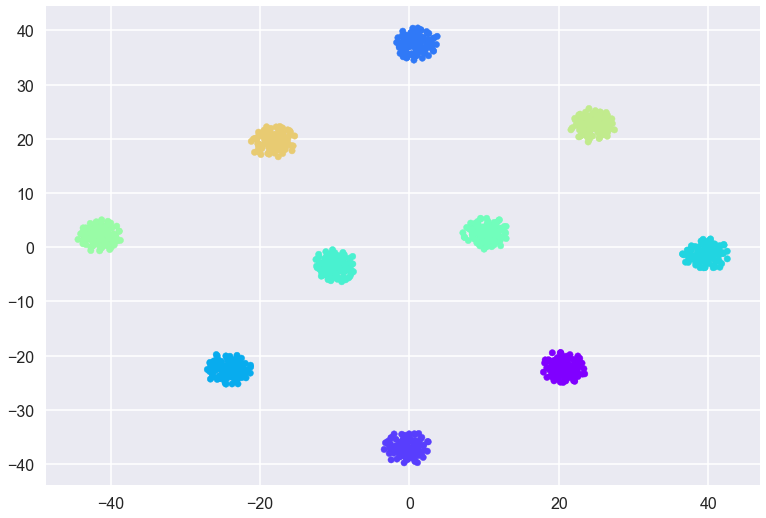

In [79]:
from sklearn.manifold import TSNE
num_points = 100
num_clust = 10
num_dim = 30
high_data = get_high_dim_data(num_clust, num_points=num_points, num_dim=num_dim)
model = TSNE(n_components=2, random_state=0,verbose=2)
low_data = model.fit_transform(high_data)


colorize = []
for i in range(num_clust):
    for _ in range(num_points):
        colorize.append(plt.cm.rainbow(i*20))
x,y = zip(*low_data)
plt.scatter(x,y,c=colorize,s=40)

## tSNE on MNIST

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

X = digits.data

model = TSNE(n_components=2, random_state=0,verbose=0)
low_data = model.fit_transform(X)

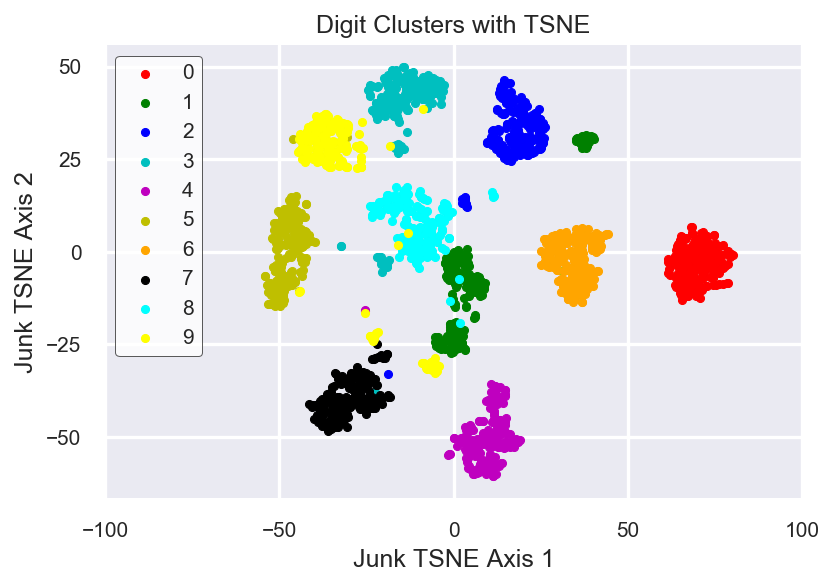

In [35]:
target = digits.target
target_names = digits.target_names

colors = cycle(['r','g','b','c','m','y','orange','k','aqua','yellow'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=1)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("Digit Clusters with TSNE", fontsize=12)
plt.ylabel("Junk TSNE Axis 2", fontsize=12)
plt.xlabel("Junk TSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

## And this is why we don't cluster in tSNE space

Shamelessly stolen from http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

In [80]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.002s...
[t-SNE] Computed neighbors for 2034 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 74.2625809, gradient norm = 0.1184585 (50 iterations in 3.851s)
[t-SNE] Iteration 100: error = 73.8157043, gradient norm = 0.1012499 (50 iterations in 3.286s)
[t-SNE] Iteration 150: error = 73.4444733, gradient norm = 0.1042851 (50 iterations in 3.108s)
[t-SNE] Iteration 200: error = 73.7871552, gradient norm = 0.0742466 (50 iterations in 3.130s)
[t-SNE] Iteration 250: error = 74.0443573, gradient norm = 0.0836649 (50 iterations in 3.301s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.044357
[t-SNE] Iteration 300: err

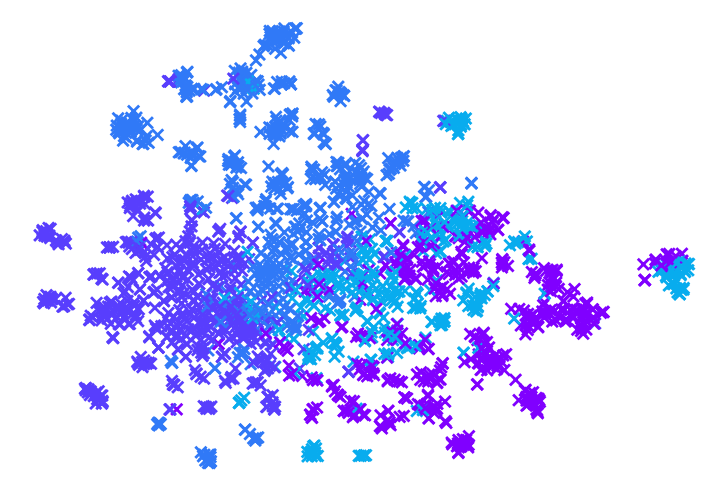

In [81]:
fig,ax = plt.subplots(111)
ax = plt.axes(frameon=False)
ax.set_xticks([])
ax.set_yticks([])
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=plt.cm.rainbow(newsgroups.target*20), marker="x")